<a href="https://colab.research.google.com/github/rafisondi/ml-playground/blob/main/Baysian_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baysian Tracking
Example from Lecture Slide 04 of Recursive Estimation by Rafael D'Andrea

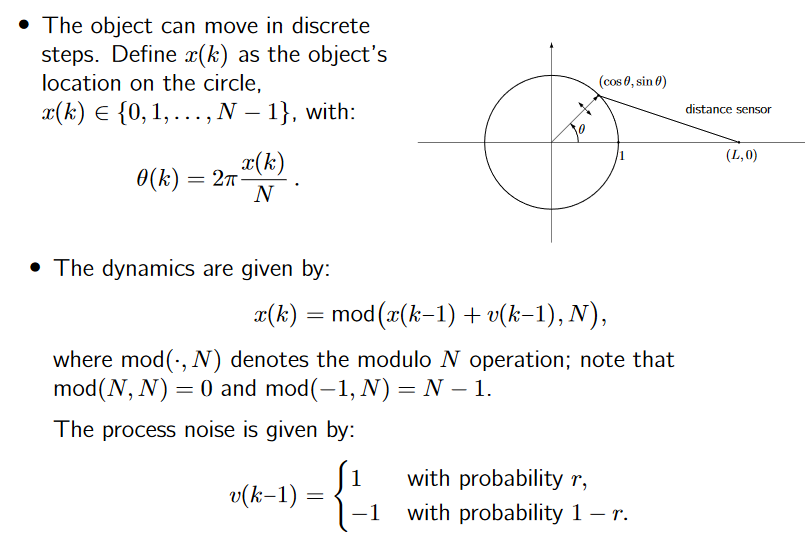

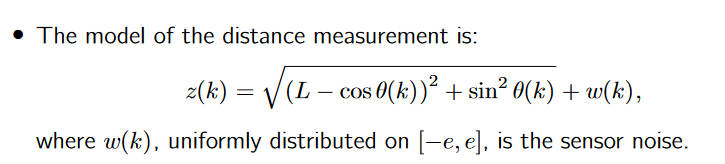

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
N = 20
timesteps = 50

L = 2
alpha = 2*np.pi / N

states = np.linspace(0, N-1 , N , dtype = 'int')
time = np.linspace(0 , timesteps , timesteps+1 ,dtype = 'int')

x_0 = 5
# Probabilities
r = 0.5
e = 0.1

print(states)

In [ ]:
def disturbance(r):
  v = np.random.uniform(0,1)
  if v < r:
    return 1
  else:
    return -1
  return v

def next_state(x , v , N):
  return np.mod(x + v , N)

In [ ]:
# Sanity check

print(next_state(-2 , 1 , 20))
print(next_state(0 , 0 , 20))

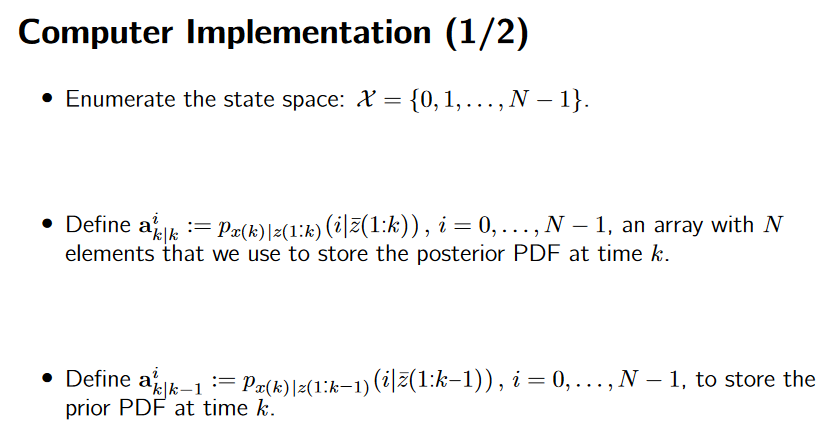


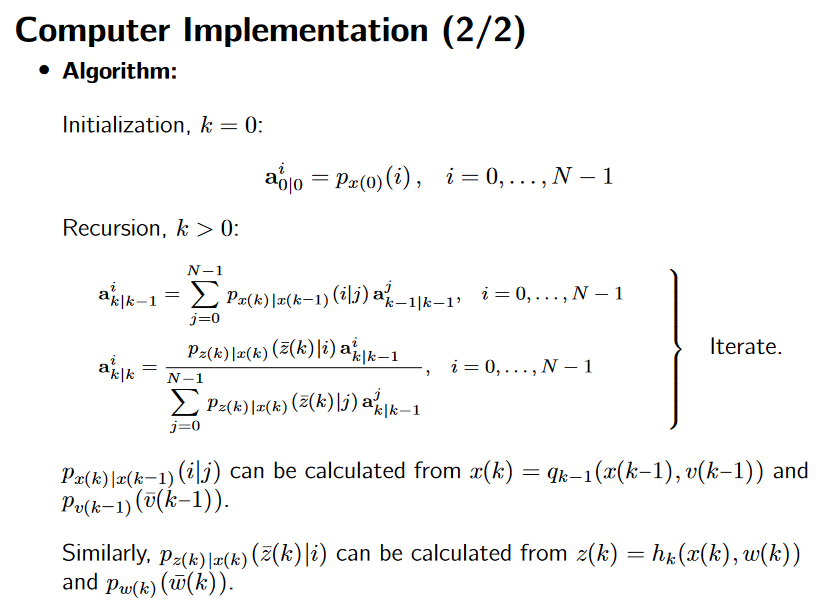

In [ ]:
x = []
z = []
for t in time:
    if t == 0:
      x.append(x_0)
    else:
      x.append(next_state(x[t-1] , disturbance(r) , N ) )

x = np.array(x)
z = (np.sqrt( (L - np.cos(x*alpha))**2 + np.sin(x*alpha)**2 )) + np.random.uniform(-e,e)


# Plotting:
plt.figure()
plt.plot( time , x*alpha , '+')
plt.grid()
plt.xlabel('t')
plt.ylabel('sigma')
plt.title("Angle position of wheel")
plt.show()

plt.figure()
plt.plot( time , z , '--')
plt.grid()
plt.xlabel('t')
plt.ylabel('D')
plt.title("Sensor Measured Noisy Distance")
plt.show()

In [ ]:
def p_x_xprior (x_new , x_prev , r ):
  if x_new == x_prev + 1:
    return r
  elif x_new == x_prev - 1:
    return 1 -r
  else:
    return 0




In [ ]:
p_xk_zk = np.zeros(N)
p_ak_zkprior = np.zeros(N)

zk_xk = 1/(2*e)

print(p_ak_zkprior)

for k in range(len(time)):
  if k == 0:
    p_xk_zk[x_0] = 1
  else:
  # Update
    for i in range(len(p_xk_zk)):
      for j in range(len(p_ak_zkprior)):
        ## Current state is x[k] and previous state is x[k-1]
        p_ak_zkprior[i] += p_x_xprior(states[i] , states[j] , r ) *  p_xk_zk[j]
    for i in range(len(p_xk_zk)):
      num =  zk_xk * p_ak_zkprior[i]
      for j in range(len(p_ak_zkprior)):
        ## Current state is x[k] and previous state is x[k-1]
        den = zk_xk * p_ak_zkprior[j]
      p_xk_zk[i] = num/den

  # print(p_ak_zkprior)
  print(p_xk_zk)


